In [60]:
%load_ext autoreload
%autoreload 2
import numpy as np
from src.cdf import *
from src.poly_fit import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
x=np.random.normal(0,1,800)
y=cdf_funct(x)

fit=polyfit(y,beta_rat_polyfit(y, np.sort(x), order=3))

_,y_sub,fit_spl_rpol=spl_polyfit(x,y)

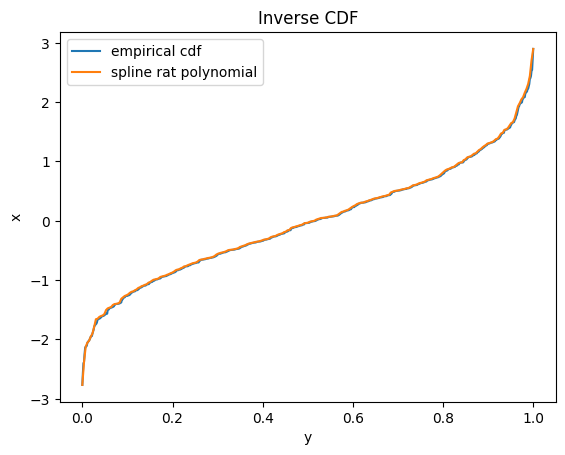

In [62]:
plt.plot(y, np.sort(x), label="empirical cdf")
# plt.plot(y, fit)
plt.plot(y_sub, fit_spl_rpol, label="spline rat polynomial")
plt.xlabel("y")
plt.ylabel("x")
plt.title("Inverse CDF")
plt.legend()


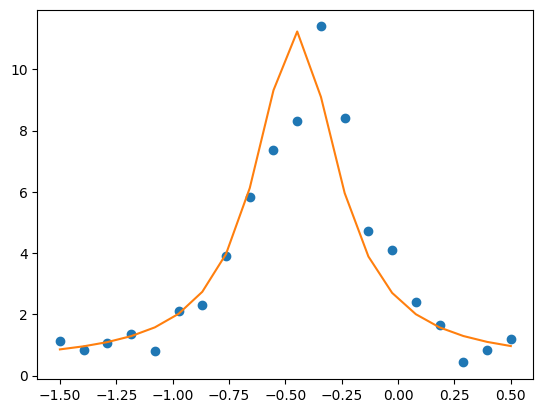

In [56]:
# checking correctness with example at https://www.originlab.com/doc/Tutorials/RationalFunc-InitialParameter
daat=[-1.5,	1.13173,
-1.39474,	0.8262,
-1.28947,	1.06999,
-1.18421,	1.37155,
-1.07895,	0.79569,
-0.97368,	2.11346,
-0.86842,	2.32006,
-0.76316,	3.9205,
-0.65789,	5.81904,
-0.55263,	7.38037,
-0.44737,	8.31272,
-0.34211,	11.39718,
-0.23684,	8.39808,
-0.13158,	4.7305,
-0.02632,	4.11105,
0.07895,	2.39105,
0.18421,	1.65394,
0.28947,	0.42953,
0.39474,	0.83337,
0.5,	1.18758]
x=np.array(daat[::2])
y=np.array(daat[1::2])
plt.plot(x,y, "o")
plt.plot(x,polyfit(x,beta_rat_polyfit(x, y, order=2)))